### Load data

In [61]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/Output_files/'

# Load files into a pandas dataframes
file = path + '0.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Set index
df = df.set_index("Date")

In [62]:
df

,Orders,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV
Date,,,,,,,
2006-01-01,1124,100.83240,0.807265,8.3,3.280000,1.170000,20177
2006-02-01,1079,100.80160,0.901804,8.0,3.440000,1.186667,12845
2006-03-01,1210,100.60100,0.899101,7.7,3.620000,1.180000,15163
2006-04-01,1147,100.48250,1.297405,7.7,3.880000,1.243333,13472
2006-05-01,1001,100.56730,1.701702,7.9,3.940000,1.260000,16516
...,...,...,...,...,...,...,...
2022-08-01,254,94.58021,7.616082,7.2,1.624904,2.153333,8163
2022-09-01,228,94.10754,8.119296,7.3,2.420836,2.133333,7867
2022-10-01,188,93.96142,8.310766,6.4,2.894486,2.136667,7132


In [63]:
df.describe()

,Orders,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,562.715686,99.547515,1.805420,7.889706,1.826215,1.483056,10491.990196
std,230.914774,1.867841,1.866685,0.957234,1.569162,0.235775,2930.397429
min,118.000000,93.961420,-1.551095,5.700000,-0.410000,1.113333,2969.000000
25%,395.500000,98.558375,0.732344,7.100000,0.497500,1.345833,8631.000000
50%,554.500000,99.582335,1.260649,8.000000,1.617452,1.460000,10197.000000
75%,693.750000,100.886650,2.641237,8.600000,3.387500,1.596667,12098.750000
max,1268.000000,102.759500,9.145037,9.900000,4.780000,2.560000,25629.000000


In [64]:
dep_var = 'Orders'  # Dependant variable

### Plot data

In [65]:
import plotly.graph_objs as go

title = 'Car sales betwwen 2006 and 2022'

fig= go.Figure()
fig.add_trace(go.Scatter(dict(x=df.index, y=df['Orders'], mode='lines+markers')))

fig.update_layout(title=go.layout.Title(text=title),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))

fig.update_xaxes(rangeslider_visible=True)
fig.show()

C:\Users\ne74255\AppData\Local\Temp/ipykernel_25960/4216423768.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



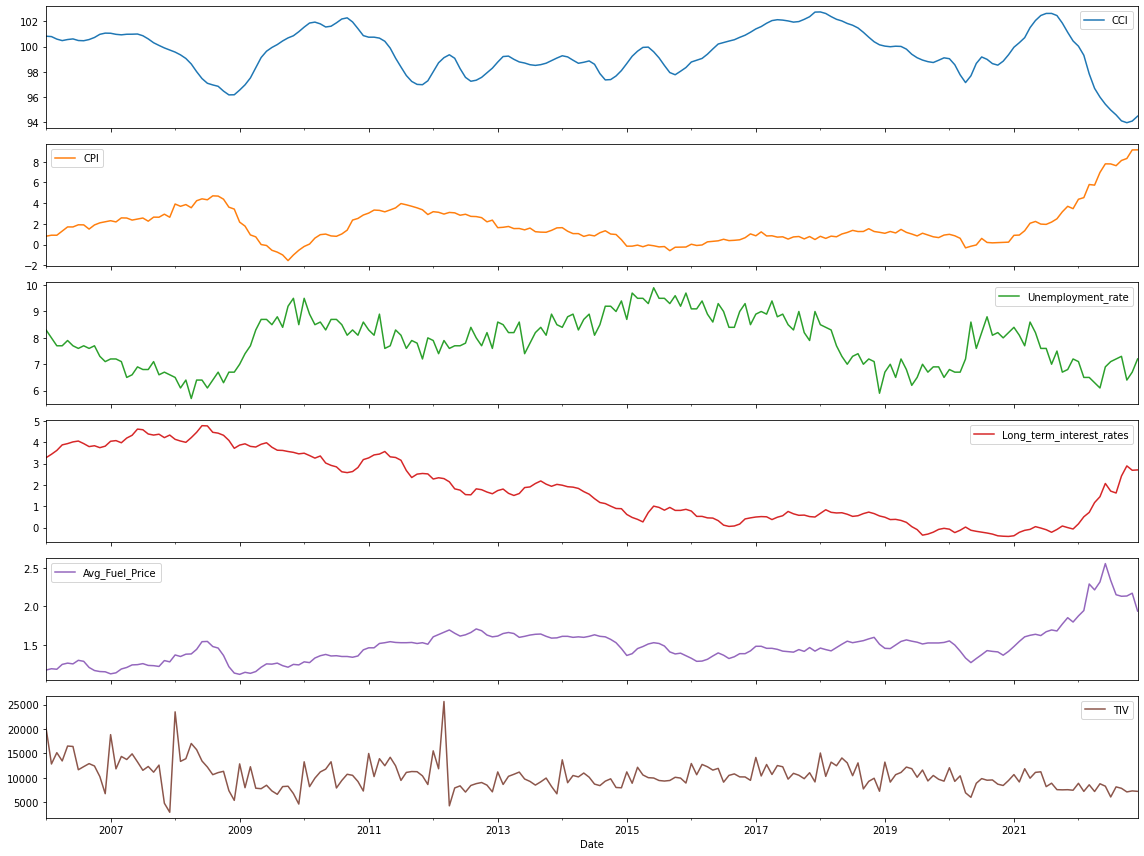

In [66]:
# Plot time series
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 12))
df.iloc[:, 1:len(df.columns)].plot(
    legend   = True,
    subplots = True, 
    sharex   = True,
    ax       = ax, 
)
fig.tight_layout();

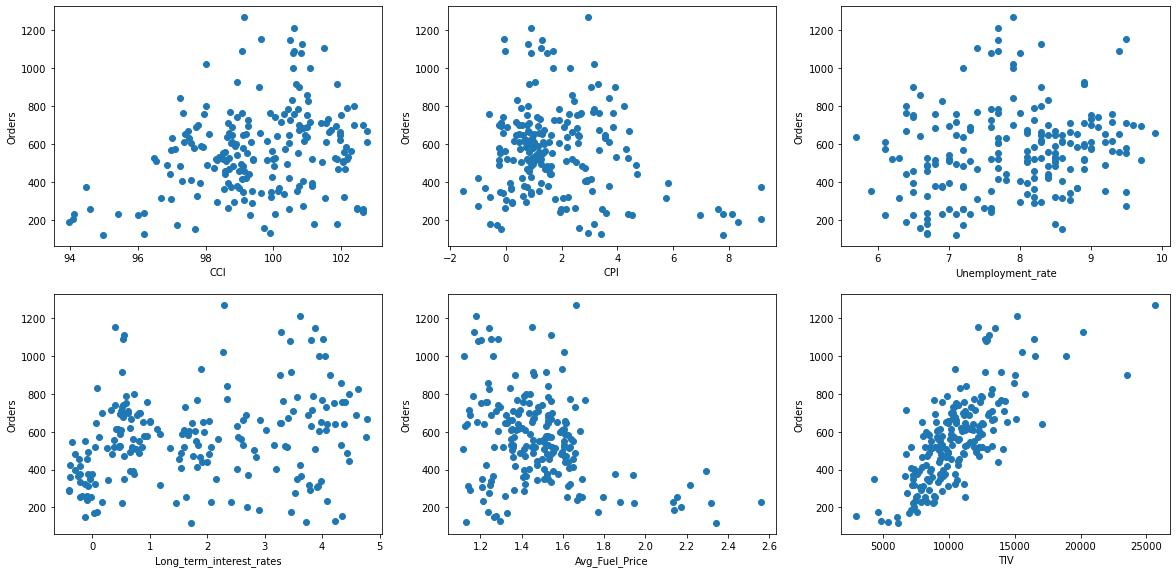

In [67]:
# Define a function to plot the scatterplots of the relationships between 
# all independent variables and the dependent variable
def plot_relationships(df, num_cols):
    
    ind_var = df.loc[:, df.columns != dep_var]  # Independant variables
    figs = len(df.columns) - 1                  # Number of figures 

    num_cols = num_cols
    num_rows = round(figs / num_cols) + 1
    
    fig = 1
    plt.figure(figsize=(20,15))
    
    # Loop through all independent variables and create the scatter plot
    for i in ind_var:
        plt.subplot(num_rows, num_cols, fig)
        plt.scatter(df[i], df[dep_var])
        plt.xlabel(str(i))
        plt.ylabel(str(dep_var))
        fig +=1

plot_relationships(df,3)

<AxesSubplot:>

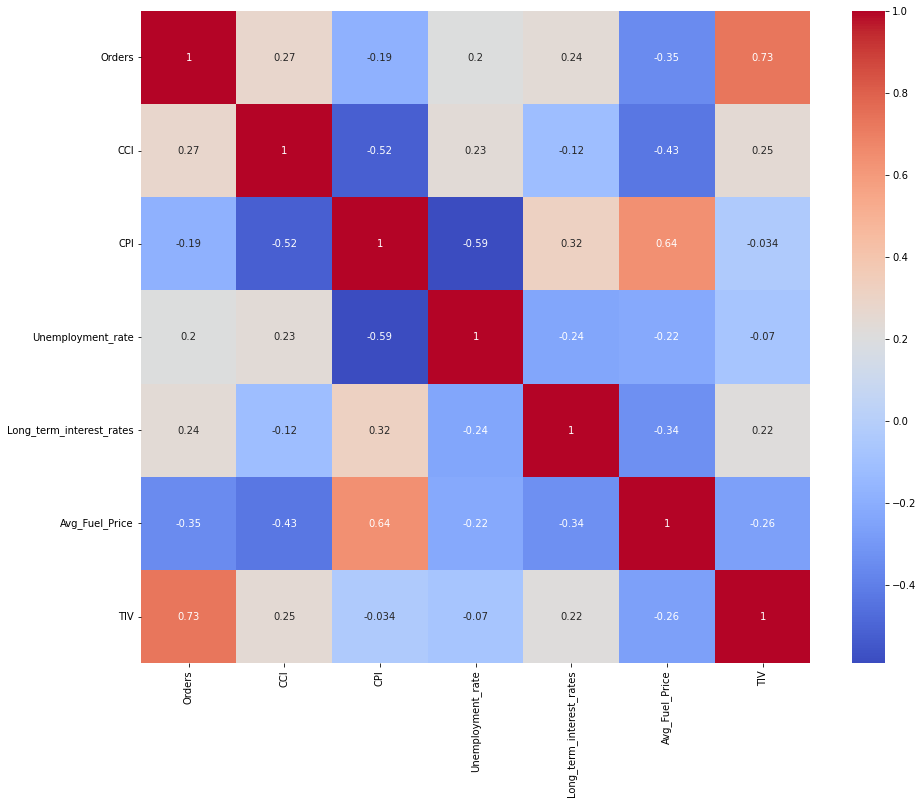

In [68]:
# Import seaborn
import seaborn as sns

# Plot the correlations as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2g')

### Seasonality

It is observed that there is an annual seasonality, with higher (median) demand values in March (following the FY closing)

In [69]:
import ipywidgets as widgets

#Generate a widget
widget = widgets.IntRangeSlider(value=[2006, 2022], min=2006, max=2022, step=1, description='Time Period:', 
        disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='d')
widget

#Prepare Data
years = widget.value
years = list(range(years[0],years[1]+1))
df['Year'] = df.index.year
df['Month_'] = [d.strftime('%b') for d in df.index]

#Draw Plot
fig = go.Figure()
for i,y in enumerate(years):
    if i<len(years):
        fig.add_trace(go.Scatter(
            x=df[df['Year']==years[i]].Month_.tolist(),
            y=df[df['Year']==years[i]].Orders.round(2).tolist(),
            name=str(years[i])))
fig.update_layout(title=go.layout.Title(text="Seasonal Trend of Monthly Orders"),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Month')),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))
   
fig.show()

df.drop(['Month_', 'Year'], axis=1, inplace=True)

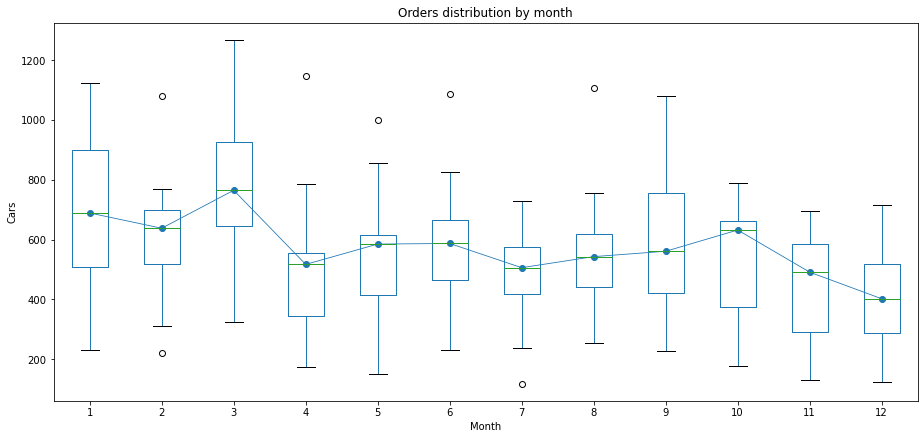

In [70]:
# Boxplot for annual seasonality
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))
df['Month'] = df.index.month
df.boxplot(column='Orders', by='Month', ax=ax,)
df.groupby('Month')['Orders'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Cars')
ax.set_title('Orders distribution by month')
fig.suptitle('');

### Trend

Rolling Statistics

A rolling average is a great way to visualize how the dataset is trending. As the dataset provides counts by month, a window size of 12 will give us the annual rolling average.

We will also include the rolling standard deviation to see how much the data varies from the rolling average.

In [71]:
# Determine rolling statistics
# Wwindow size 12 denotes 12 months, giving rolling mean at yearly level
window_size = 12
df["rolling_avg"] = df['Orders'].rolling(window=window_size).mean() 
df["rolling_std"] = df['Orders'].rolling(window=window_size).std()

title = 'Rolling Mean & Standard Deviation'

fig= go.Figure()

fig.add_trace(go.Scatter(dict(x=df.index, y=df['Orders'], mode='lines+markers', name= 'Original')))
fig.add_trace(go.Scatter(dict(x=df.index, y=df['rolling_avg'], mode='lines', name= 'Rolling Mean')))
fig.add_trace(go.Scatter(dict(x=df.index, y=df['rolling_std'], mode='lines', name= 'Rolling Std')))

fig.update_layout(title=go.layout.Title(text=title),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))

fig.show()

df.drop(['rolling_avg', 'rolling_std'], axis=1, inplace=True)

### Time series decomposition 

We separate a time series into its components: trend, seasonality, and residuals. The trend represents the slow-moving changes in a time series. It is responsible for making the series gradually increase or decrease over time. The seasonality component represents the seasonal pattern in the series. The cycles occur repeatedly over a fixed period of time. The residuals represent the behavior that cannot be explained by the trend and seasonality components. They correspond to random errors, also termed white noise.

In [72]:
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    x_values = dates
    return (
        make_subplots(
            rows=4,
            cols=1,
            shared_xaxes=True,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed'), row=1, col=1,)
        .add_trace(go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend'), row=2, col=1,)
        .add_trace(go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal'), row=3, col=1,)
        .add_trace(go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual'), row=4, col=1,)
        .update_layout(height=700, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False)
        .update_xaxes(dtick="M6",tickformat="%b\n%Y")        
    )

decomposition = seasonal_decompose(df['Orders'], model='multiplicative', period=12)
fig = plot_seasonal_decompose(decomposition, dates=df.index)
fig.show()    

### Stationarity (Augmented Dickey–Fuller Test)

The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. Similar to a t-test, we set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

* Null Hypothesis: The data is not stationary.

* Alternative Hypothesis: The data is stationary.

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

* p-value <= significance level (0.01, 0.05, 0.10, etc.)

If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

Results of Dickey-Fuller Test:
Test Statistic                  -1.422679
p-value                          0.571356
#Lags Used                      13.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


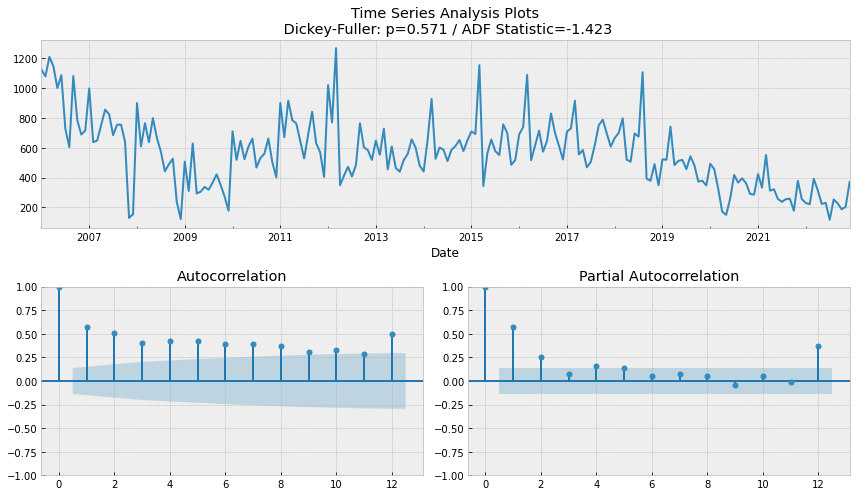

In [73]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Time series analysis plot
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        result = adfuller(y, autolag='AIC',regression='c')
        adf = result[0]
        p_value = result[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.3f} / ADF Statistic={1:.3f}'.format(p_value, adf))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, method='ywm')
        plt.tight_layout()
        
# Data Stationarity check using Augmented Dickey Fuller(ADF) test
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC',regression='c')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return dfoutput['p-value']

tsplot(df['Orders'], lags=12)
p_value = adf_test(df['Orders'])     

Results of Dickey-Fuller Test:
Test Statistic                  -4.769177
p-value                          0.000062
#Lags Used                      12.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


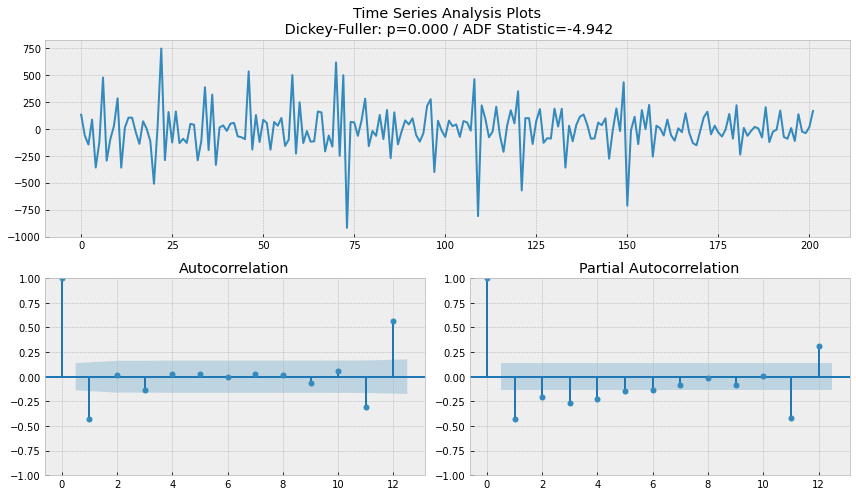

In [74]:
import numpy as np

if p_value > 0.05:
    # Take the first difference to make our series stationary    
    data_diff = np.diff(df['Orders'],1)
    tsplot(data_diff[1:], lags=12)
    p_value = adf_test(data_diff)  

### Correlation plots

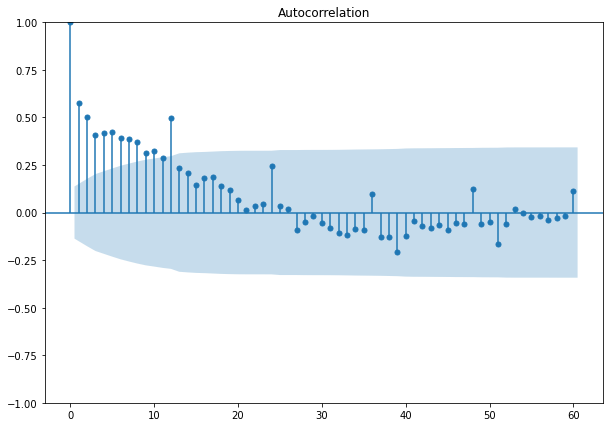

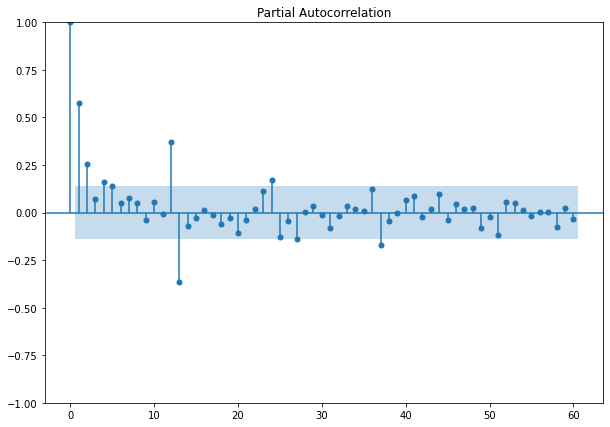

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 7))
plot_acf(df['Orders'], ax=ax, lags=60)

# Partial autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 7))
plot_pacf(df['Orders'], ax=ax, lags=60, method='ywm')
plt.show()

### Feature engineering

https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas#8

In [76]:
# # Feature engineering
# import numpy as np
# df['Quarter'] = pd.PeriodIndex(df.index, freq='Q').quarter
# df['Month'] = pd.PeriodIndex(df.index, freq='M').month
# df['Year'] = pd.PeriodIndex(df.index, freq='Y').year

# df['Orders_last_year'] = df['Orders'].shift(12)

# df['LTIR_lagged_1m'] = df.Long_term_interest_rates.shift(1)
# df['LTIR_lagged_2m'] = df.Long_term_interest_rates.shift(2)
# df['LTIR_lagged_3m'] = df.Long_term_interest_rates.shift(3)

# df['CCI_lagged_1m'] = df.CCI.shift(1)
# df['CCI_lagged_2m'] = df.CCI.shift(2)
# df['CCI_lagged_3m'] = df.CCI.shift(3)

# df['CPI_lagged_1m'] = df.CPI.shift(1)
# df['CPI_lagged_2m'] = df.CPI.shift(2)
# df['CPI_lagged_3m'] = df.CPI.shift(3)

# df['UR_lagged_1m'] = df.Unemployment_rate.shift(1)
# df['UR_lagged_2m'] = df.Unemployment_rate.shift(2)
# df['UR_lagged_3m'] = df.Unemployment_rate.shift(3)

# df['AFP_lagged_1m'] = df.Avg_Fuel_Price.shift(1)
# df['AFP_lagged_2m'] = df.Avg_Fuel_Price.shift(2)
# df['AFP_lagged_3m'] = df.Avg_Fuel_Price.shift(3)

In [77]:
# # Remove trend
# rolling_mean = df.Orders.rolling(window = 12).mean()
# df['Orders_rolled_detrended'] = df.Orders - rolling_mean
# ax1 = plt.subplot(121)
# df['Orders_rolled_detrended'].plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
# ax2 = plt.subplot(122)
# df.Orders.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [78]:
# # Remove seasonality
# # Differencing Over Time-Series with Rolling Mean taken over 12 Months
# df['Orders_rolled_detrended_diff'] = df.Orders_rolled_detrended - df.Orders_rolled_detrended.shift()

# ax1 = plt.subplot(121)
# df.Orders_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Rolled & Differenced Time-Series", ax=ax1);
# ax2 = plt.subplot(122)
# df.Orders.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [79]:
df.dropna(inplace=True)
df.drop('Month', axis=1, inplace=True)

In [80]:
df

,Orders,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV
Date,,,,,,,
2006-01-01,1124,100.83240,0.807265,8.3,3.280000,1.170000,20177
2006-02-01,1079,100.80160,0.901804,8.0,3.440000,1.186667,12845
2006-03-01,1210,100.60100,0.899101,7.7,3.620000,1.180000,15163
2006-04-01,1147,100.48250,1.297405,7.7,3.880000,1.243333,13472
2006-05-01,1001,100.56730,1.701702,7.9,3.940000,1.260000,16516
...,...,...,...,...,...,...,...
2022-08-01,254,94.58021,7.616082,7.2,1.624904,2.153333,8163
2022-09-01,228,94.10754,8.119296,7.3,2.420836,2.133333,7867
2022-10-01,188,93.96142,8.310766,6.4,2.894486,2.136667,7132


In [81]:
# Save data to Excel so we don't need to run these steps every time
df.to_excel("Datasets/Output_files/1.xlsx") 

In [82]:
Orders = df[['Orders']]

In [83]:
Orders

,Orders
Date,
2006-01-01,1124
2006-02-01,1079
2006-03-01,1210
2006-04-01,1147
2006-05-01,1001
...,...
2022-08-01,254
2022-09-01,228
2022-10-01,188


In [84]:
# Save data to Excel so we don't need to run these steps every time
Orders.to_excel("Datasets/Output_files/Orders.xlsx") 

### Pandas profiling

In [85]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [86]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


### Summary Tools

In [87]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Orders[int64],Mean (sd) : 562.7 (230.9)min < med < max:118.0 < 554.5 < 1268.0IQR (CV) : 298.2 (2.4),174 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABVElEQVR4nO3csW2EMBiGYSeKROO0XHGdF0gWyASpMgFtZqLzBDdVilDTICGRCbj4F2B8/t6nprD0IrCx756WZXGo3/PZA0AeL2cP4J62bb+895eUa8dx/B2G4Xb0mB5V0aG995eu635Sru37/jOEwE2xoujQFk3TvKbeFDHG69HjKQ3vaBGEFkFoEYQWQWgRhBZBaBGEFkFoEYQWQWgRhBZRzaaGxTRN7yGE75Rra9npkgytuNOVPbTlMME8z2/OuaQguC97aMthghjjx9HjUcFkTAShRRBaBKFFEFrELrNulkzl2yU0S6by8egWQWgRhBZBaBGEFkFoEavLK9bGdVkNzdq4Ljy6RRBaBKFFEFoEoUVIHve1qOUMOKH/ceQZ8Jz/o0boExm/VWz6IQHvaBGEFsGje0eWiZtzefcICL0jy8TNOdsewdbZP6EfxNbZP+9oEX/lL31qxdFqhQAAAABJRU5ErkJggg=="">",0(0.0%)
2,CCI[float64],Mean (sd) : 99.5 (1.9)min < med < max:94.0 < 99.6 < 102.8IQR (CV) : 2.3 (53.3),204 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABTklEQVR4nO3cPQ6CMACG4WpMWOoKgxsX0At4CE/A6rU4gadykJmFhARPQKRCf+j3PjNDkzeUtoKHaZoM8neMPQCEcYo9gBjKsnxYa6sl1/Z9/+m67uV7TL5JhrbWVk3TvJdc27btxfd4QmDqFkFoEYQWQWgRhBYhuer2xWXbZkzYrRuhN+SybTMm7NaNqVsEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBGfdPwzDcKvr+rnk2nEcr8aYxWfdIRH6h6Iozg7vl919j+dfTN0iuKN3Yu0ryoTeibWvKDN1i+COjijkij6b0C7PsFS2QSFX9NmEdnyGJbsN8oVntAhCiyC0iKSf0XtcYKUq6dAssLbD1C2C0CIILYLQIggtgtAiCC2C0CIILWL2ZMzX3yhyrBnHbGhff6PIsWYcTN0iNvlRI5evGXK2SehcvmbI2Rew7nSnS/OBKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,CPI[float64],Mean (sd) : 1.8 (1.9)min < med < max:-1.6 < 1.3 < 9.1IQR (CV) : 1.9 (1.0),203 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABUUlEQVR4nO3cMWrDMABAUbUU4kFdnaFLyQXSC+QQPYHWXksn6NYb9B5dOtSzF4PBOUBIKoHjBP//ZhELPpEVI+dhmqag9Xu89QS0jKelL9i27XuMcVsytu/7v67rPq89J4LFQ8cYtyml35KxOeeXa8+HwqUbwtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haIhZznXXHMofx3EfQig61635zBK68lD+ofRzh2F42+12HyVjfavjssXf1Kix2WyefatjHt6jIQwNYWgIQ0Pc9Washjv0y1YT2h36ZS7dEIaGMDSEoSEMDWFoCENDrOZ3dA3iwxVkaOLDFZduiLPfaI8HrcvZ0Nc6HqTbQN6j70XlPx2/xhh/CseebCAN/Y/KHXpxjBBCaJpmn1L6Khmbcz6klL4Lx55sII+U6WvWqm6u+QAAAABJRU5ErkJggg=="">",0(0.0%)
4,Unemployment_rate[float64],Mean (sd) : 7.9 (1.0)min < med < max:5.7 < 8.0 < 9.9IQR (CV) : 1.5 (8.2),40 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABU0lEQVR4nO3aPQ6CMBiH8WpMWOqKgxsX0At4CE/A6rU4gadykJmFhARPYKRgS3n/z29maPKEt+VjN46jg337tReANA5rLyB3ZVnevfenKdd2Xfdu2/YZe01zEPoH7/2pruvXlGubpjnHXs9cjG4RhBZBaBGEFkFoEWZO3VYeg2IxE9rKY1AsjG4RhBZhZnSH6Pv+WlXVY8q1wzBcnHOTtoScSYYuiuIYsJ/fYq8nhaxDh5ykc7jzQiaFc2lP/1mHDjxJr37nhUwK59Ke/jmMiSC0iOSje2v7rhXJQ29t37WC0S2C0CIILYLQIggtgtAiCC2C0CL+8sKEt135+0to3nblj9EtIuvv0daF/Kiw9CcFQq8o8JemRT8pMLpFEFoEo3sjlu7nhN6Ipfs5o1sEoUUQWgShRRBaxNdTN1+kbPkami9StjC6RRBaBKFFEFoEoUV8ADLYerPJUfllAAAAAElFTkSuQmCC"">",0(0.0%)
5,Long_term_interest_rates[float64],Mean (sd) : 1.8 (1.6)min < med < max:-0.4 < 1.6 < 4.8IQR (CV) : 2.9 (1.2),178 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABYUlEQVR4nO3aMU7DMBiG4R+ElMWs6cCCcgG4AIfgBF65Vk7AKbgHCwOZs0SKFAaGskTYcura/t5nbRRZel3HcXuzbZuhfbfXHgDyuNv7oO/7V+fcKeQm8zw/Ouc+A6/9nqbpPXB8OMhuaOfcyXv/FXKTcRxfvPcfgdc+hA4Ox2HpFkFoEYQWQWgRhBZBaBGEFkFoEbsHJri8yNPHpBNFQl9R5Olj0oli9tDLsjwPw/AWci3n4sfJHrrruvtcsxhnbMZEEFoEoUU0s+vO+apSo2ZC53xVqRFLt4hmvtEliHl8mJmt6/pkZkGrUCpCHyjm8WH2+1+7S47nL5ZuEYQWQWgRh